###AHASANA SULTANA <BR>
###ASHRITHA K <BR>
###HARSHITHA V SONEJI <BR>
###PULKIT KHANDELWAL


# Predicting Car selling price using Machine Learning

This notebook looks into using various Python-based ML and Data Science libraries in an attempt to build a Machine Learning
model capable of predicting selling price of car based on various attributes.

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling


## 1. Problem Defintion

In a statement,
> Given various factors of the car in the form of independent variables, which can be used to  predict the car selling price?

## 2. Data

The original data came from the Cleavland data from the Kaggle Machine Learning Repository


<a href="https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho">Car Price Prediction</a>

## 3. Evaluation

**Target to reach more than 75%**

If the model scored better than 75% we will select the model


##4.Features <br>
Features are available in the data set for reference


## Preparing the tools
 
**We are going to use :-**

* Pandas & Numpy for Data Analysis and Manipulation


* Matplotlib and Seaborn for Data Visualisation


* Scikit-Learn for the Modeling building and Reports

In [ ]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Models from Scikit-Learn
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

#Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")


### Importing the dataset

In [ ]:
Car_Data_1 = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
Car_Data_2 = pd.read_csv('/content/Car details v3.csv') 
Car_Data_3 = pd.read_csv('/content/car data.csv')
 

### Head of the dataset

In [ ]:
#First 5 records of the dataset
Car_Data_1.head() 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
#First 5 records of the dataset
Car_Data_2.head() 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
#First 5 records of the dataset
Car_Data_3.head() 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<br><br>
# Exploratory Data analysis
<br>

###Shape of the Data

In [ ]:
Car_Data_1.shape

(4340, 8)

In [ ]:
Car_Data_2.shape

(8128, 13)

In [ ]:
Car_Data_3.shape

(301, 9)

### Information about the data

In [ ]:
Car_Data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
Car_Data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
Car_Data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Description about the dataset

In [ ]:
#Statistical Description of the data
Car_Data_1.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
#Statistical Description of the data
Car_Data_2.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
#Statistical Description of the data
Car_Data_3.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Are there any missing values?

In [ ]:
#Checking for null values
print(Car_Data_1.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [ ]:
#Checking for null values
print(Car_Data_2.isnull().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [ ]:
#Checking for null values
print(Car_Data_3.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


**Elimination of Car_Data_3**<br>
The dataset is a mixture of  both car and bike details and it is very hard to segregate the car and bike details in the dataset. The given details are also incomplete or without proper details, for example the car names and the ownership of the car.

##Dropping the columns

In [ ]:
# drop columns : the correlation of these columns is too low with respect to selling price
Car_Data_2=Car_Data_2.drop(['mileage','engine','max_power','seats','torque'], axis = 1)

##Renaming the columns of both the Datasets

In [ ]:
# rename the columns
Car_Data_1.rename(columns = {'name':'Car_Name', 'year': 'Year_Bought','selling_price':'Selling_Price','km_driven':'Kms_Driven','fuel':'Fuel_Type','seller_type':'Seller_Type','transmission':'Transmission','owner':'Owner'}, inplace = True)
Car_Data_2.rename(columns = {'name':'Car_Name', 'year': 'Year_Bought','selling_price':'Selling_Price','km_driven':'Kms_Driven','fuel':'Fuel_Type','seller_type':'Seller_Type','transmission':'Transmission','owner':'Owner'},inplace = True)

##Combining The Datasets into a single Dataframe

In [ ]:
# combining the 2 datasets
frames = [Car_Data_1, Car_Data_2]
data = pd.concat(frames)

### Correlation matrix & Matrix Visualisation

In [ ]:
#Correlation of Data
data.corr()

,Year_Bought,Selling_Price,Kms_Driven
Year_Bought,1.000000,0.412442,-0.411786
Selling_Price,0.412442,1.000000,-0.213450
Kms_Driven,-0.411786,-0.213450,1.000000


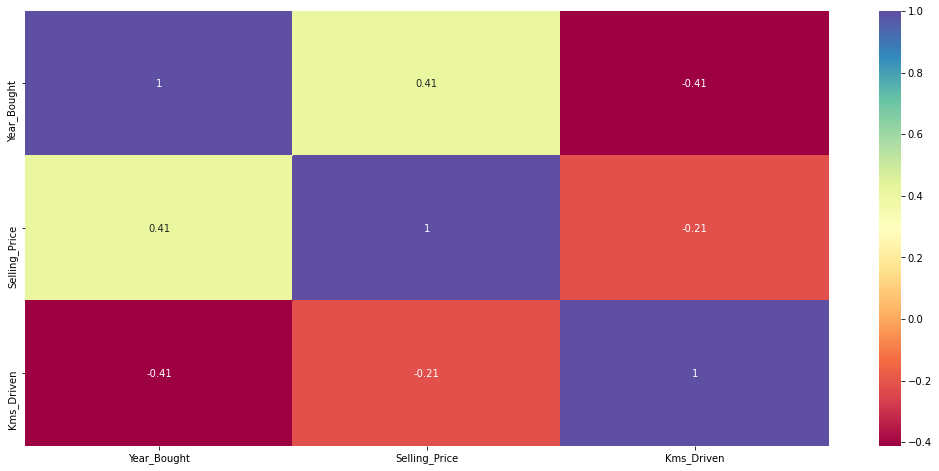

In [ ]:
#plotting the heatmap
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True,cmap= 'Spectral')
plt.show()

The above heatmap shows that the highest correlation can be observed between Year_bought and Selling_Price

In [ ]:
#Gives the number of rows and columns
data.shape

(12468, 8)

In [ ]:
data.describe()

,Year_Bought,Selling_Price,Kms_Driven
count,12468.000000,1.246800e+04,1.246800e+04
mean,2013.555743,5.915773e+05,6.856508e+04
std,4.118485,7.377876e+05,5.333721e+04
min,1983.000000,2.000000e+04,1.000000e+00
25%,2011.000000,2.400000e+05,3.500000e+04
50%,2014.000000,4.200000e+05,6.000000e+04
75%,2017.000000,6.500000e+05,9.000000e+04
max,2020.000000,1.000000e+07,2.360457e+06


##Feature Extraction of the feature Year

In [ ]:
data['Years'] = data.apply(lambda row: datetime.datetime.now().year - 
                                  (row.Year_Bought), axis = 1)
data

,Car_Name,Year_Bought,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,14
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,14
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,9
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,7
...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,8
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,14
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,12
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,8


Here, we are extracting the number of years ('Years') the car has been with the previous owner with the help of the variable 'year' for the datasets <b>data</b> .

##Visualisation

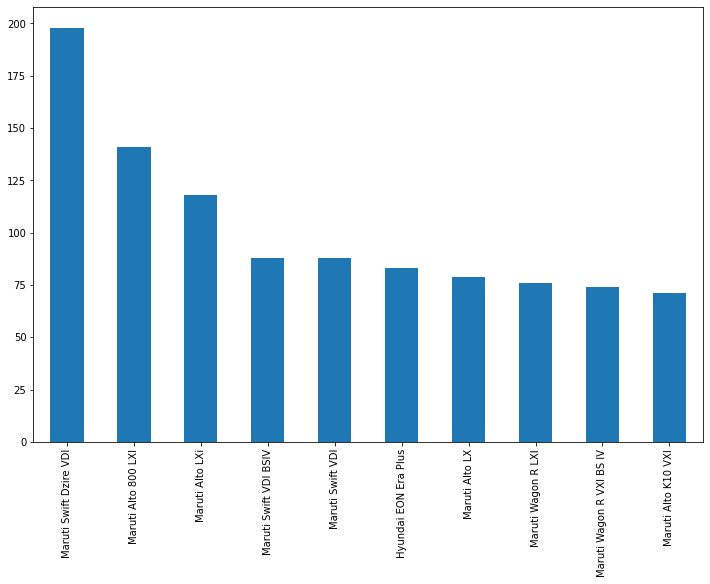

In [ ]:
#visualizing the top 10 most sold cars
top10=data.Car_Name.value_counts().head(10)
plt.figure(figsize=(12,8))
top10.plot(kind='bar')
plt.show()

Above graph shows us the Top ten most sold cars, and <b>Maruti Swift Dzire VDI</b> is the most sold Car throughout

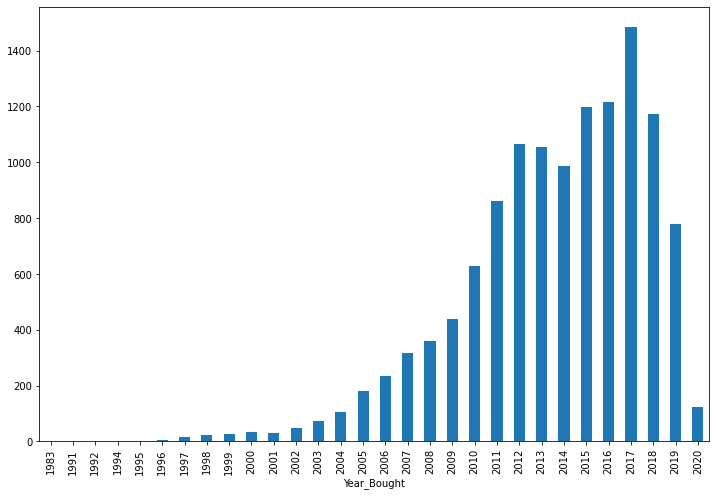

In [ ]:
plt.figure(figsize=(12,8))
data.groupby('Year_Bought').count()['Car_Name'].plot(kind='bar')
plt.show()

The above graph gives us an idea of the cars sold every year according to the dataset <b>data</b>, and most of the cars sold were bought in the year <b>2017</b>

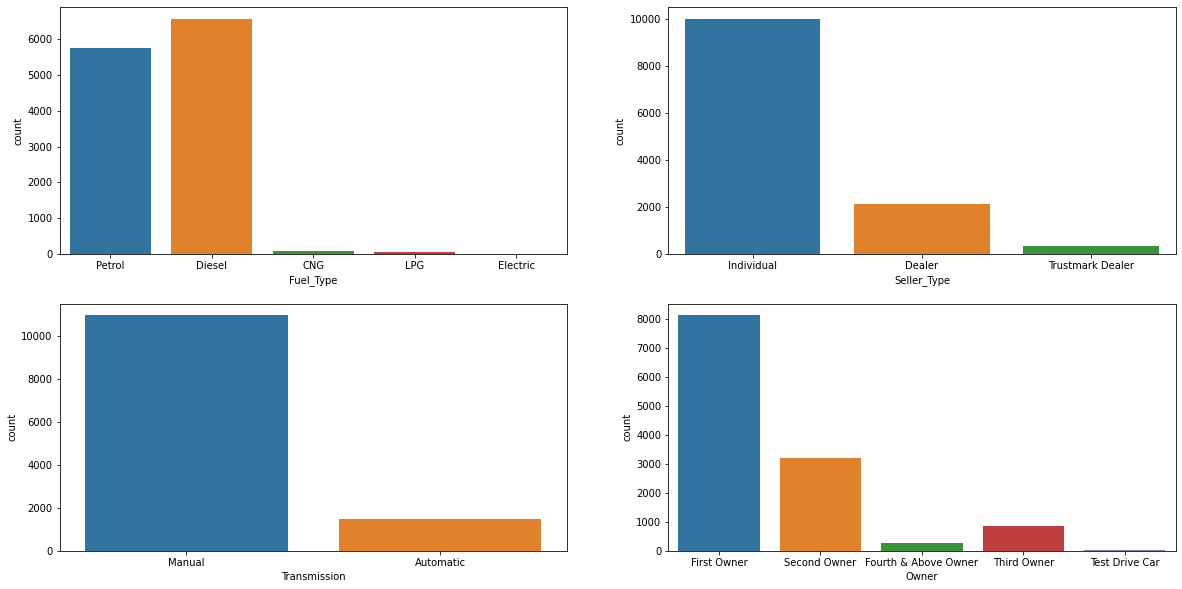

In [ ]:
# countplots for fuel,seller_type,transmission and owner

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(data.Fuel_Type)
plt.subplot(2,2,2)
sns.countplot(data.Seller_Type)
plt.subplot(2,2,3)
sns.countplot(data.Transmission)
plt.subplot(2,2,4)
sns.countplot(data.Owner)
plt.show()

From the above plots we can analyse that<br>
1) The number of cars having their 'Fuel_Type' type as Diesel is greater when compared to the other types namely: Petrol, CNG, LPG and Electric. Though there is very slight difference in the number of cars running on Diesel and cars running on Petrol <br> We can also observe that there are negligible  cars which run on electricity.
<br>
2)We can observe that most of the cars are sold through Individual sellers when compared to Dealers and very less cars are sold through Trustmark Dealer.
<br>
3)We clearly see that Manual cars are much more in number when compared to Automatic cars.
<br>
4)This plot shows that most of the cars are sold by the First Owners and negligible number of cars are sold by the Test Drive cars.


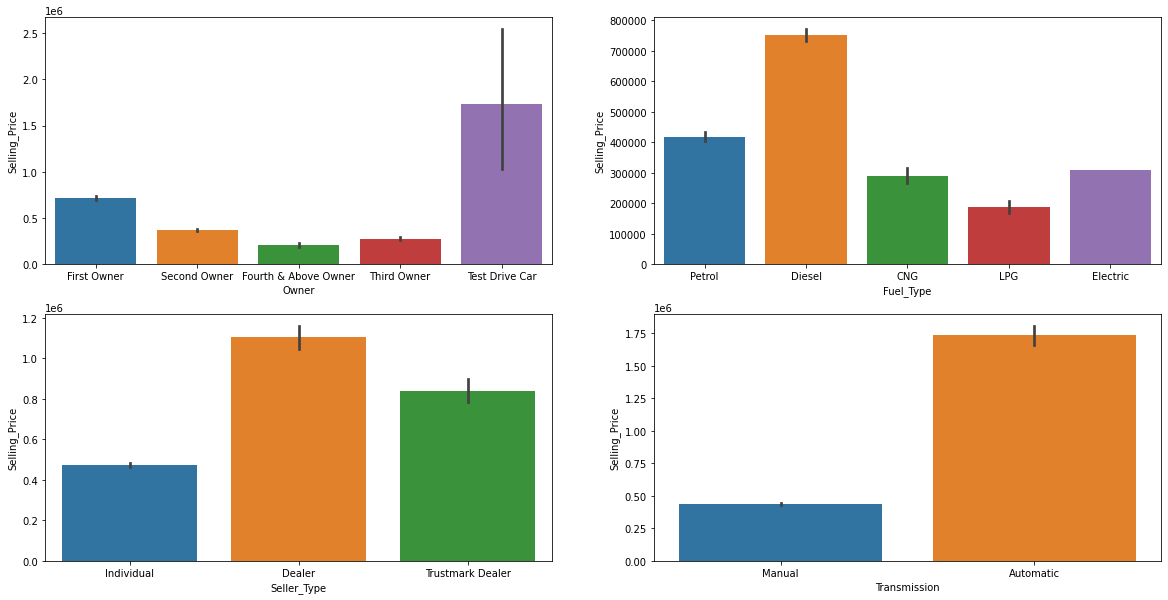

In [ ]:
#plotting categorical variable vs target variable

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(data.Owner,data.Selling_Price)
plt.subplot(2,2,2)
sns.barplot(data.Fuel_Type,data.Selling_Price)
plt.subplot(2,2,3)
sns.barplot(data.Seller_Type,data.Selling_Price)
plt.subplot(2,2,4)
sns.barplot(data.Transmission,data.Selling_Price)
plt.show()

From the above plots we can analyse that
<br>
1)Test Drive cars holds a higher value in terms of 'Selling_Price' whereas we can also observe that the 'Selling_Price' reduces with an increase in the number of 'Owner'.
<br>
2)The cars with 'Fuel_Type' Diesel has a higher 'Selling_Price' compared to the rest and at the same time cars running on LPG costs less.
<br>
3)The cars sold by the 'Seller_Type' Dealers have a higher range whereas Individual sellers cost low.
<br>
4)The cars with Automatic 'Transmission' costs more than the cars with Manual Transmission. 

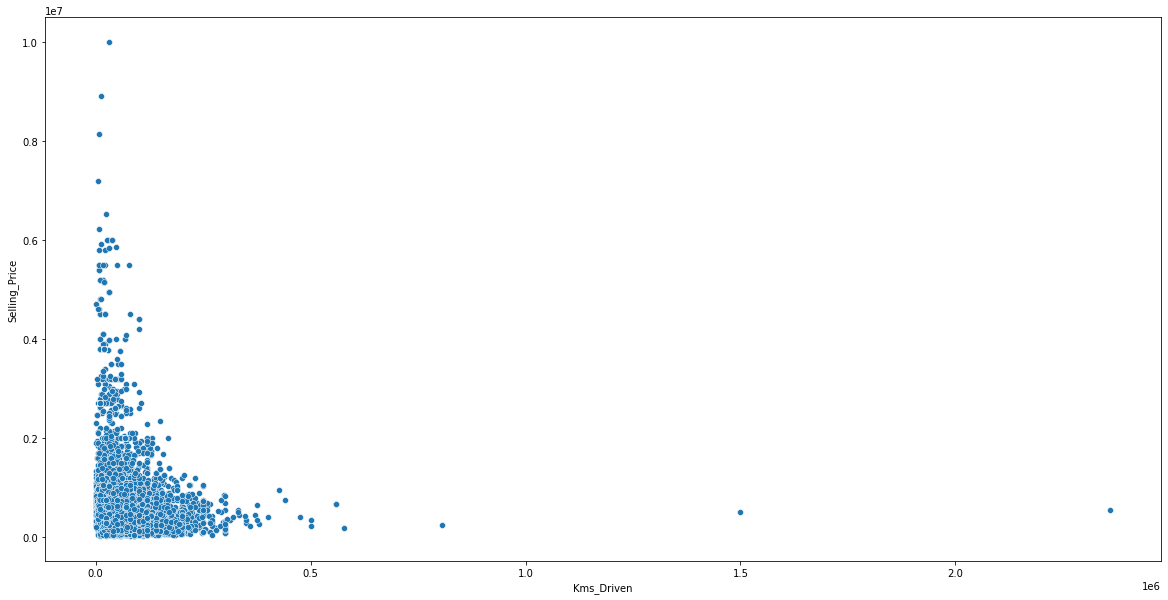

In [ ]:
#kms_driven vs selling price
plt.figure(figsize=(20,10))
sns.scatterplot(data.Kms_Driven,data.Selling_Price)
plt.show()

From the above Scatterplot, we can see that as the 'Kms_Driven' increases, the 'Selling_Price' decreases.

##Checking out unique values of the Data

In [ ]:
#To check the number of unique values in each column
for col in data.columns:
  print(col,": ",len(data[col].unique()))

Car_Name :  2511
Year_Bought :  30
Selling_Price :  799
Kms_Driven :  1437
Fuel_Type :  5
Seller_Type :  3
Transmission :  2
Owner :  5
Years :  30


###One Hot Encoding of the Dataset

In [ ]:
#Seperating the Categorical and non-categorical variables
#noncat = data.drop(['Fuel_Type','Seller_Type','Transmission','Owner'],axis=1)
#cat = data[['Fuel_Type','Seller_Type','Transmission','Owner']]

In [ ]:
df = data.drop(['Car_Name','Year_Bought'],axis =1)

In [ ]:
#Creating dummy variables for the categorical columns
df=pd.get_dummies(df, drop_first=True)
df

,Selling_Price,Kms_Driven,Years,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,60000,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,7,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,8,0,0,0,1,1,0,1,0,0,0,0
8124,135000,119000,14,1,0,0,0,1,0,1,1,0,0,0
8125,382000,120000,12,1,0,0,0,1,0,1,0,0,0,0
8126,290000,25000,8,1,0,0,0,1,0,1,0,0,0,0


###Statistical Description of the combined Data

In [ ]:
df.describe()

,Selling_Price,Kms_Driven,Years,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
count,1.246800e+04,1.246800e+04,12468.000000,12468.000000,12468.000000,12468.000000,12468.000000,12468.000000,12468.000000,12468.000000,12468.000000,12468.000000,12468.000000,12468.000000
mean,5.915773e+05,6.856508e+04,7.444257,0.525746,0.000080,0.004893,0.461501,0.802855,0.027109,0.879852,0.020452,0.257539,0.001765,0.068896
std,7.377876e+05,5.333721e+04,4.118485,0.499357,0.008956,0.069778,0.498536,0.397858,0.162409,0.325147,0.141547,0.437296,0.041971,0.253288
min,2.000000e+04,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.400000e+05,3.500000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.200000e+05,6.000000e+04,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,6.500000e+05,9.000000e+04,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000e+07,2.360457e+06,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###Correlation Matrix and Visualisation  of the combined data

In [ ]:
df.corr()

,Selling_Price,Kms_Driven,Years,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
Selling_Price,1.000000,-0.213450,-0.412442,0.227896,-0.003418,-0.038345,-0.216489,-0.320079,0.055298,-0.571451,-0.074868,-0.172048,0.065348,-0.115299
Kms_Driven,-0.213450,1.000000,0.411786,0.272092,-0.001102,0.027323,-0.276137,0.196836,-0.085219,0.176497,0.095730,0.204444,-0.048897,0.159858
Years,-0.412442,0.411786,1.000000,-0.079959,0.016431,0.063610,0.072888,0.207116,-0.102311,0.212672,0.198233,0.303010,-0.059756,0.266617
Fuel_Type_Diesel,0.227896,0.272092,-0.079959,1.000000,-0.009430,-0.073827,-0.974713,-0.009172,-0.094654,-0.000214,-0.013692,0.031895,-0.013649,-0.006098
Fuel_Type_Electric,-0.003418,-0.001102,0.016431,-0.009430,1.000000,-0.000628,-0.008291,-0.018074,-0.001495,-0.024236,-0.001294,0.015207,-0.000377,-0.002436
Fuel_Type_LPG,-0.038345,0.027323,0.063610,-0.073827,-0.000628,1.000000,-0.064912,0.026078,-0.011705,0.025911,0.014232,0.021792,-0.002948,0.012695
Fuel_Type_Petrol,-0.216489,-0.276137,0.072888,-0.974713,-0.008291,-0.064912,1.000000,0.001767,0.099080,-0.008744,0.008317,-0.037853,0.014747,0.005444
Seller_Type_Individual,-0.320079,0.196836,0.207116,-0.009172,-0.018074,0.026078,0.001767,1.000000,-0.336864,0.309207,0.068755,0.172903,-0.084844,0.124447
Seller_Type_Trustmark Dealer,0.055298,-0.085219,-0.102311,-0.094654,-0.001495,-0.011705,0.099080,-0.336864,1.000000,-0.117553,-0.024121,-0.056525,-0.007018,-0.045407
Transmission_Manual,-0.571451,0.176497,0.212672,-0.000214,-0.024236,0.025911,-0.008744,0.309207,-0.117553,1.000000,0.039454,0.102556,-0.013852,0.058639


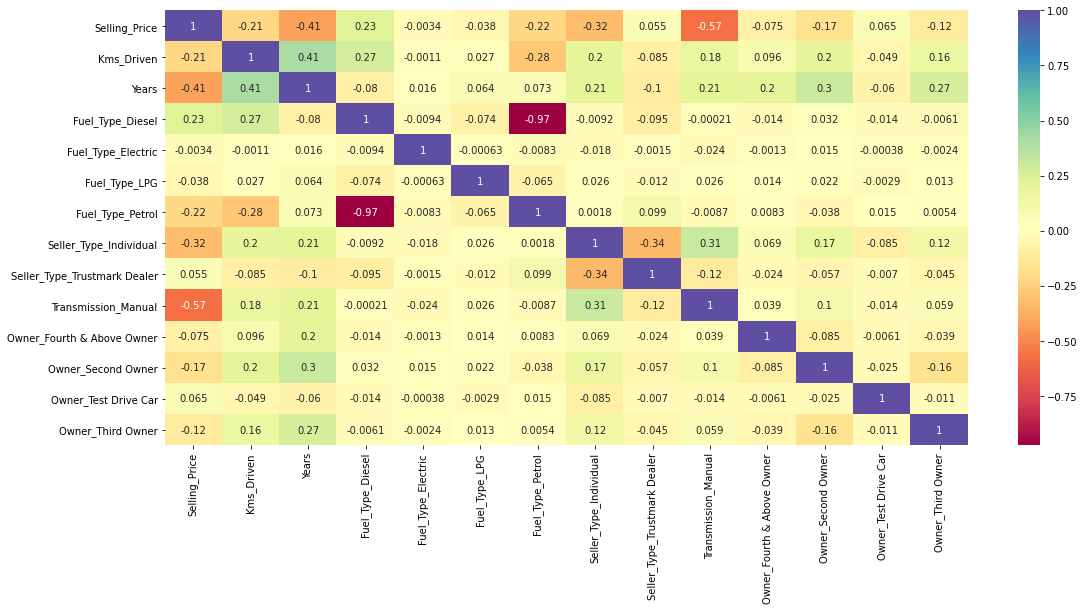

In [ ]:
#plotting the heatmap
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,cmap= 'Spectral')
plt.show()

## 5. Modelling
 

In [ ]:
#Assigning the X and Y with necessary variables 
X = df.drop(['Selling_Price'],axis=1)
y = df['Selling_Price']

### Train-Test Split of the data

In [ ]:
#splitting the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

###Random Forest Regressor

In [ ]:
#Random Forest Regressor
RFR = RandomForestRegressor()

In [ ]:
#Training the data
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#Training score of the data
RFR.score(X_train, y_train)

0.9311134090139545

In [ ]:
#Prediction of the test variable
y_predict = RFR.predict(X_test)

In [ ]:
#Testing score of the data
R2_score = RFR.score(X_test, y_test)
R2_score

0.7613876293501972

#### Evaluating the Algorithm

In [ ]:
#Mean absolute error of the model
mae_score = MAE(y_test, y_predict)
mae_score

166096.2533857301

In [ ]:
#mean squared error of the model
mse_score = MSE(y_test, y_predict)
mse_score

115726873273.71161

In [ ]:
#root Mean Squared Error of the model
rmse_score = np.sqrt(MSE(y_test, y_predict))
rmse_score

340186.52717841667

### HyperParameter tuning with Randomized Search CV

We are going to tune:
* Random Forest Classifier

... using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
#Tune Random Forest Regression
np.random.seed(42)

#Setup random hyperparameter search for Random Forest Regression
rs_rfr_reg=RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=random_grid,
                              cv=5,
                              n_iter=20,
                              verbose=2)

#Fit random hyperparameter search for Random Forest Regression
rs_rfr_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.9s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.9s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.9s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.9s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=600, min

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 15.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
#best parameters of the model
rs_rfr_reg.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [ ]:
#testing score of the model after tunning
rs_rfr_reg.score(X_test,y_test)

0.7878995272529107

<br>

## Feature Importance

Let's find the feature importance for our Random Forest Regression model...

In [ ]:
# Helps to find Coefficients
importance = RFR.feature_importances_
importance

array([2.43322761e-01, 2.10035128e-01, 5.99182752e-02, 0.00000000e+00,
       1.45579390e-05, 4.85309572e-02, 7.40227230e-02, 4.73341144e-03,
       3.40703129e-01, 3.50463971e-04, 1.08719441e-02, 6.24088928e-03,
       1.25575967e-03])

In [ ]:
# These coef's tell how much and in what way did each one of it contribute to predicting the target variable
# summarize feature importance
col = X.columns
features = {}
for i,v in enumerate(importance):
  features[col[i]]=v

features


{'Fuel_Type_Diesel': 0.05991827522166009,
 'Fuel_Type_Electric': 0.0,
 'Fuel_Type_LPG': 1.4557939023373657e-05,
 'Fuel_Type_Petrol': 0.04853095724819468,
 'Kms_Driven': 0.24332276107491363,
 'Owner_Fourth & Above Owner': 0.0003504639709232939,
 'Owner_Second Owner': 0.01087194411683878,
 'Owner_Test Drive Car': 0.006240889277937706,
 'Owner_Third Owner': 0.001255759671173785,
 'Seller_Type_Individual': 0.07402272296160872,
 'Seller_Type_Trustmark Dealer': 0.004733411441232601,
 'Transmission_Manual': 0.3407031291939044,
 'Years': 0.21003512788258882}

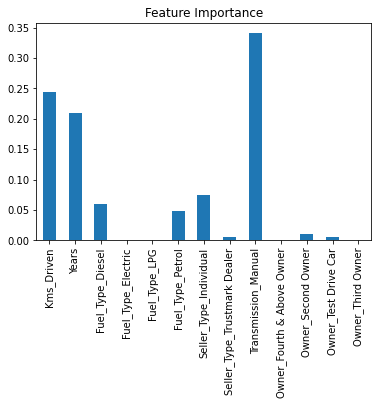

In [ ]:
#Visualize feature importance
feature_df=pd.DataFrame(features,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

Transmission Manual is the feature has highest importance

###Saving the trained model 

In [ ]:
#loading the package pickle
import pickle 

In [ ]:
#saving the trained model into a pkl binary file
file = open('car_price_prediction.pkl','wb')
pickle.dump(rs_rfr_reg,file)